In [1]:
import numpy as np
import pandas as pd
import wbdata
import matplotlib.pyplot as plt
import HIVstats
import plotly.graph_objects as go
import scipy.stats as stats
#The usual suspects
np.set_printoptions(suppress=True)
%load_ext autoreload

%autoreload 2

In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install wbdata

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [5]:

countries = list(HIVstats.alpha3codedict.values())
df = wbdata.get_dataframe(HIVstats.indicators,country=countries)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8580 entries, (Afghanistan, 2019) to (Zimbabwe, 1960)
Data columns (total 7 columns):
Gross Domestic Product perCap    6917 non-null float64
Gross Domestic Product           6920 non-null float64
Literacy Rate                    730 non-null float64
Hospital Beds                    2533 non-null float64
Urbanization                     8400 non-null float64
Secondary School Education       4558 non-null float64
Population                       8397 non-null float64
dtypes: float64(7)
memory usage: 496.0+ KB


In [7]:
df.head()

Gross Domestic Product perCap  Gross Domestic Product  \
country     date                                                          
Afghanistan 2019                            NaN                     NaN   
            2018                     520.896603            1.936297e+10   
            2017                     556.302139            2.019176e+10   
            2016                     547.228110            1.936264e+10   
            2015                     578.466353            1.990711e+10   

                  Literacy Rate  Hospital Beds  Urbanization  \
country     date                                               
Afghanistan 2019            NaN            NaN           NaN   
            2018       43.01972            NaN        25.495   
            2017            NaN            NaN        25.250   
            2016            NaN            NaN        25.020   
            2015            NaN            0.5        24.803   

                  Secondary School Education  Population  
country     date                                          
Afghanistan 2019                         NaN         NaN  
            2018                         NaN  37172386.0  
            2017                    53.79764  36296400.0  
            2016                    50.64540  35383128.0  
            2015                    52.59281  34413603.0

In [8]:
df.loc(axis=0)[:,'2018'].loc(axis=1)['Literacy Rate']

country       date
Afghanistan   2018    43.01972
Angola        2018         NaN
Albania       2018    98.14115
Argentina     2018    99.00387
Armenia       2018         NaN
                        ...   
Vietnam       2018    95.00038
Yemen, Rep.   2018         NaN
South Africa  2018         NaN
Zambia        2018    86.74796
Zimbabwe      2018         NaN
Name: Literacy Rate, Length: 143, dtype: float64

In [9]:
dfcountrydata = df

In [10]:
dfcountrydata.update(df.groupby(level=0).bfill())

In [11]:
dfcountrydata.loc(axis=0)[:,('2018','2010','2005','2000')].head(20)

Gross Domestic Product perCap  Gross Domestic Product  \
country     date                                                          
Afghanistan 2018                     520.896603            1.936297e+10   
            2010                     543.303042            1.585657e+10   
            2005                     242.031379            6.209140e+09   
            2000                     264.111317            3.478788e+09   
Angola      2018                    3432.385736            1.057510e+11   
            2010                    3587.883798            8.379950e+10   
            2005                    1902.422346            3.697092e+10   
            2000                     556.836318            9.129595e+09   
Albania     2018                    5268.848504            1.510250e+10   
            2010                    4094.362119            1.192696e+10   
            2005                    2673.787283            8.052076e+09   
            2000                    1126.683318            3.480355e+09   
Argentina   2018                   11683.949622            5.198715e+11   
            2010                   10385.964432            4.236274e+11   
            2005                    5109.851325            1.987371e+11   
            2000                    7708.100996            2.842038e+11   
Armenia     2018                    4212.070943            1.243309e+10   
            2010                    3218.372707            9.260285e+09   
            2005                    1643.753029            4.900470e+09   
            2000                     622.742139            1.911564e+09   

                  Literacy Rate  Hospital Beds  Urbanization  \
country     date                                               
Afghanistan 2018      43.019720         0.5000        25.495   
            2010      18.157681         0.4000        23.737   
            2005      18.157681         0.4000        22.703   
            2000      18.157681         0.3000        22.078   
Angola      2018      66.030110         0.8000        65.514   
            2010      67.405420         0.8000        59.783   
            2005      67.405420         0.8000        56.000   
            2000            NaN         1.2913        50.087   
Albania     2018      98.141150         2.9000        60.319   
            2010      95.938640         3.0000        52.163   
            2005      98.712980         3.1000        46.731   
            2000            NaN         3.3000        41.741   
Argentina   2018      99.003870         5.0000        91.870   
            2010      98.954970         4.5000        90.849   
            2005      97.193310         4.0000        90.031   
            2000      96.128197         4.1000        89.142   
Armenia     2018      99.736070         4.2000        63.149   
            2010      99.400160         3.7000        63.440   
            2005      99.400160         4.5000        63.938   
            2000      98.751961         6.4000        64.666   

                  Secondary School Education  Population  
country     date                                          
Afghanistan 2018                   53.797640  37172386.0  
            2010                   50.567250  29185507.0  
            2005                   18.616810  25654277.0  
            2000                   20.822451  20779953.0  
Angola      2018                   50.671480  30809762.0  
            2010                   26.259220  23356246.0  
            2005                   14.983590  19433602.0  
            2000                   12.266280  16395473.0  
Albania     2018                   95.432330   2866376.0  
            2010                   88.103890   2913021.0  
            2005                   77.909390   3011487.0  
            2000                   71.078080   3089027.0  
Argentina   2018                  108.733600  44494502.0  
            2010                   99.501260  40788453.0  
            20

In [12]:
df1 = pd.read_csv("data/data.csv")

In [13]:
df3 = pd.read_csv("data/data-2.csv")
df4 = pd.read_csv("data/data-3.csv")
df5 = pd.DataFrame(list(HIVstats.PepfarOps.items())) # President's Emergency Plan for Aids Relief!

In [14]:
df0 = df1

In [15]:
df0.columns = ['Country','TherapyPercentage2018','TherapyNumber2018','HIV2018','HIV2010','HIV2005','HIV2000']

In [16]:
df2 = df0.loc[(df0['TherapyPercentage2018']!='No data')| (df0['TherapyNumber2018']!='No data')]
df2.drop(0,inplace=True)
df2.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country,TherapyPercentage2018,TherapyNumber2018,HIV2018,HIV2010,HIV2005,HIV2000
1,Afghanistan,13 [7–20],920,7200 [4100–11 000],4200 [2500–6200],2900 [1700–5000],1600 [1000–3500]
2,Albania,No data,580,No data,No data,No data,No data
3,Algeria,81 [75–86],12 800,16 000 [15 000–17 000],7100 [6600–7600],3700 [3500–4000],1900 [1700–2000]
4,Angola,27 [23–31],88 700,330 000 [290 000–390 000],220 000 [180 000–250 000],150 000 [120 000–170 000],87 000 [72 000–110 000]
5,Argentina,61 [55–67],85 500,140 000 [130 000–150 000],110 000 [96 000–120 000],85 000 [76 000–94 000],64 000 [55 000–71 000]


In [17]:
df2.replace('No data',np.nan,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4278: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
df2.loc(axis=1)['Country'].replace({'Bahamas':'Bahamas, The','Bolivia (Plurinational State of)':'Bolivia',
                                    'Côte d\'Ivoire':'Cote d\'Ivoire','Democratic Republic of the Congo':'Congo, Dem. Rep.',
                                    'Congo':'Congo, Rep.','Czechia':'Czech Republic','Egypt':'Egypt, Arab Rep.','Gambia':'Gambia, The',
                                    'Iran (Islamic Republic of)':'Iran, Islamic Rep.','Kyrgyzstan':'Kyrgyz Republic',
                                    'Lao People\'s Democratic Republic':'Lao PDR','Republic of Moldova':'Moldova',
                                    'Republic of North Macedonia':'North Macedonia','Slovakia':'Slovak Republic','Viet Nam':'Vietnam',
                                    'Yemen':'Yemen, Rep.','United Republic of Tanzania':'Tanzania'},inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
splitcol = df2.TherapyPercentage2018.str.split(' \[',expand=True)
splitcol.columns=['TherapyPercentage2018avg','TherapyPercentageRange']
df2=df2.join(splitcol)
df2.head()

,Country,TherapyPercentage2018,TherapyNumber2018,HIV2018,HIV2010,HIV2005,HIV2000,TherapyPercentage2018avg,TherapyPercentageRange
1,Afghanistan,13 [7–20],920,7200 [4100–11 000],4200 [2500–6200],2900 [1700–5000],1600 [1000–3500],13,7–20]
2,Albania,NaN,580,NaN,NaN,NaN,NaN,NaN,NaN
3,Algeria,81 [75–86],12 800,16 000 [15 000–17 000],7100 [6600–7600],3700 [3500–4000],1900 [1700–2000],81,75–86]
4,Angola,27 [23–31],88 700,330 000 [290 000–390 000],220 000 [180 000–250 000],150 000 [120 000–170 000],87 000 [72 000–110 000],27,23–31]
5,Argentina,61 [55–67],85 500,140 000 [130 000–150 000],110 000 [96 000–120 000],85 000 [76 000–94 000],64 000 [55 000–71 000],61,55–67]


In [20]:
splitcol2 = df2.HIV2018.str.split(' \[',expand=True)
splitcol3 = df2.HIV2010.str.split(' \[',expand=True)
splitcol4 = df2.HIV2005.str.split(' \[',expand=True)
splitcol5 = df2.HIV2000.str.split(' \[',expand=True)
splitcol2.columns=['HIV2018avg','HIV2018range']
splitcol3.columns=['HIV2010avg','HIV2010range']
splitcol4.columns=['HIV2005avg','HIV2005range']
splitcol5.columns=['HIV2000avg','HIV2000range']
df2=df2.join(splitcol2).join(splitcol3).join(splitcol4).join(splitcol5)
df2.head()

,Country,TherapyPercentage2018,TherapyNumber2018,HIV2018,HIV2010,HIV2005,HIV2000,TherapyPercentage2018avg,TherapyPercentageRange,HIV2018avg,HIV2018range,HIV2010avg,HIV2010range,HIV2005avg,HIV2005range,HIV2000avg,HIV2000range
1,Afghanistan,13 [7–20],920,7200 [4100–11 000],4200 [2500–6200],2900 [1700–5000],1600 [1000–3500],13,7–20],7200,4100–11 000],4200,2500–6200],2900,1700–5000],1600,1000–3500]
2,Albania,NaN,580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Algeria,81 [75–86],12 800,16 000 [15 000–17 000],7100 [6600–7600],3700 [3500–4000],1900 [1700–2000],81,75–86],16 000,15 000–17 000],7100,6600–7600],3700,3500–4000],1900,1700–2000]
4,Angola,27 [23–31],88 700,330 000 [290 000–390 000],220 000 [180 000–250 000],150 000 [120 000–170 000],87 000 [72 000–110 000],27,23–31],330 000,290 000–390 000],220 000,180 000–250 000],150 000,120 000–170 000],87 000,72 000–110 000]
5,Argentina,61 [55–67],85 500,140 000 [130 000–150 000],110 000 [96 000–120 000],85 000 [76 000–94 000],64 000 [55 000–71 000],61,55–67],140 000,130 000–150 000],110 000,96 000–120 000],85 000,76 000–94 000],64 000,55 000–71 000]


In [21]:
df2['TherapyPercentage2018avg'] = df2.TherapyPercentage2018avg.str.replace(" ","")
df2['HIV2018avg']=df2.HIV2018avg.str.replace(" ","")
df2['HIV2018avg']=df2.HIV2018avg.str.replace("<","")
df2['HIV2010avg']=df2.HIV2010avg.str.replace(" ","")
df2['HIV2010avg']=df2.HIV2010avg.str.replace("<","")
df2['HIV2005avg']=df2.HIV2005avg.str.replace(" ","")
df2['HIV2005avg']=df2.HIV2005avg.str.replace("<","")
df2['HIV2000avg']=df2.HIV2000avg.str.replace(" ","")
df2['HIV2000avg']=df2.HIV2000avg.str.replace("<","")
df2['TherapyNumber2018']=df2.TherapyNumber2018.str.replace(" ","")
df2 = df2.astype({'TherapyPercentage2018avg':float,'TherapyNumber2018':float,'HIV2018avg':float,'HIV2010avg':float,'HIV2005avg':float,'HIV2000avg':float})

In [22]:
df2.drop(['TherapyPercentage2018','HIV2018','HIV2010','HIV2005','HIV2000'],axis=1,inplace=True)

In [23]:
df2.head()

,Country,TherapyNumber2018,TherapyPercentage2018avg,TherapyPercentageRange,HIV2018avg,HIV2018range,HIV2010avg,HIV2010range,HIV2005avg,HIV2005range,HIV2000avg,HIV2000range
1,Afghanistan,920.0,13.0,7–20],7200.0,4100–11 000],4200.0,2500–6200],2900.0,1700–5000],1600.0,1000–3500]
2,Albania,580.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Algeria,12800.0,81.0,75–86],16000.0,15 000–17 000],7100.0,6600–7600],3700.0,3500–4000],1900.0,1700–2000]
4,Angola,88700.0,27.0,23–31],330000.0,290 000–390 000],220000.0,180 000–250 000],150000.0,120 000–170 000],87000.0,72 000–110 000]
5,Argentina,85500.0,61.0,55–67],140000.0,130 000–150 000],110000.0,96 000–120 000],85000.0,76 000–94 000],64000.0,55 000–71 000]


In [24]:
df4.columns = ['Country','HIV (ARV) treatment 2014 in specialized facilities and services',
               'HEPATITIS treatment 2014 in specialized facilities and services',
               'HIV testing and councelling 2014 in specialized facilities and services',
               'Hepatitis testing and councelling 2014 in specialized facilities and services',
               'Hepatitis Vaccination 2014 in specialized facilities and services']

In [25]:
df44 = df4.drop([0,1])

In [26]:
df44.set_index('Country',inplace=True)
df440 = HIVstats.forcemulindex(df44,'2018',df44.columns,['country','date'])
df440.index = [df440.index.get_level_values(0),df440.index.get_level_values(1).astype(str)]

In [27]:
df33 = df3[df3['Year']==2013]

In [28]:
df33.set_index('Country',inplace=True)

In [29]:
df33.columns=['Year',
              'Total Density/100k: Health Posts 2013',
              'Total Density/100k: Health Centers 2103',
              'Total Density/100k: Rural Hospitals 2013',
              'Total Density/100k: Provincial Hospitals 2013',
              'Total Density/100k: Specialized Hospitals 2013',
              'Total Density/100k: Total Hospitals 2013']
df331 = HIVstats.forcemulindex(df33,'2018',df33.columns[1:7],['country','date'])
df331.index = [df331.index.get_level_values(0),df331.index.get_level_values(1).astype(str)]

In [30]:
df5.set_index(0,inplace=True)
df5.columns = ['PEPFar Aid']
df550 = HIVstats.forcemulindex(df5,'2018',df5.columns,['country','date'])
df550.index = [df550.index.get_level_values(0),df550.index.get_level_values(1).astype(str)]

In [31]:
df550.head()

,,PEPFar Aid
country,date,
Afghanistan,2018,0
Albania,2018,0
Algeria,2018,0
Angola,2018,63970147
Argentina,2018,0


In [32]:
df2.set_index("Country",inplace=True)

In [33]:
df220 = df2[['HIV2018avg','HIV2010avg','HIV2005avg','HIV2000avg']]
df221 = HIVstats.forcemulindex(df2,'2018',['TherapyNumber2018','TherapyPercentage2018avg'],['country','date'])
df221.index = [df221.index.get_level_values(0),df221.index.get_level_values(1).astype(str)]
df220.columns=['2018','2010','2005','2000']
df220 = df220.stack().to_frame()
df220.index = [df220.index.get_level_values(0).rename('country'),df220.index.get_level_values(1).rename('date').astype(str)]
df220.columns=['Average HIV patients']


df220 = df220.join(df221,on=['country','date'])

In [34]:
df234 = df220.join(df331,on=['country','date'])

In [35]:
#df234 = df230.join(df440, on=['country','date'])

In [36]:
dfHIVfull = dfcountrydata.loc(axis=0)[:,('2018','2010','2005','2000')].join(df234, on=['country','date']).join(df550,on=['country','date'])

In [37]:
dfHIVfull.head(20)

Gross Domestic Product perCap  Gross Domestic Product  \
country     date                                                          
Afghanistan 2018                     520.896603            1.936297e+10   
            2010                     543.303042            1.585657e+10   
            2005                     242.031379            6.209140e+09   
            2000                     264.111317            3.478788e+09   
Angola      2018                    3432.385736            1.057510e+11   
            2010                    3587.883798            8.379950e+10   
            2005                    1902.422346            3.697092e+10   
            2000                     556.836318            9.129595e+09   
Albania     2018                    5268.848504            1.510250e+10   
            2010                    4094.362119            1.192696e+10   
            2005                    2673.787283            8.052076e+09   
            2000                    1126.683318            3.480355e+09   
Argentina   2018                   11683.949622            5.198715e+11   
            2010                   10385.964432            4.236274e+11   
            2005                    5109.851325            1.987371e+11   
            2000                    7708.100996            2.842038e+11   
Armenia     2018                    4212.070943            1.243309e+10   
            2010                    3218.372707            9.260285e+09   
            2005                    1643.753029            4.900470e+09   
            2000                     622.742139            1.911564e+09   

                  Literacy Rate  Hospital Beds  Urbanization  \
country     date                                               
Afghanistan 2018      43.019720         0.5000        25.495   
            2010      18.157681         0.4000        23.737   
            2005      18.157681         0.4000        22.703   
            2000      18.157681         0.3000        22.078   
Angola      2018      66.030110         0.8000        65.514   
            2010      67.405420         0.8000        59.783   
            2005      67.405420         0.8000        56.000   
            2000            NaN         1.2913        50.087   
Albania     2018      98.141150         2.9000        60.319   
            2010      95.938640         3.0000        52.163   
            2005      98.712980         3.1000        46.731   
            2000            NaN         3.3000        41.741   
Argentina   2018      99.003870         5.0000        91.870   
            2010      98.954970         4.5000        90.849   
            2005      97.193310         4.0000        90.031   
            2000      96.128197         4.1000        89.142   
Armenia     2018      99.736070         4.2000        63.149   
            2010      99.400160         3.7000        63.440   
            2005      99.400160         4.5000        63.938   
            2000      98.751961         6.4000        64.666   

                  Secondary School Education  Population  \
country     date                                           
Afghanistan 2018                   53.797640  37172386.0   
            2010                   50.567250  29185507.0   
            2005                   18.616810  25654277.0   
            2000                   20.822451  20779953.0   
Angola      2018                   50.671480  30809762.0   
            2010                   26.259220  23356246.0   
            2005                   14.983590  19433602.0   
            2000                   12.266280  16395473.0   
Albania     2018                   95.432330   2866376.0   
            2010                   88.103890   2913021.0   
            2005                   77.909390   3011487.0   
            2000                   71.078080   3089027.0   
Argentina   2018                  108.733600  44494502.0   
            2010                   99.501260  40788453.0  

In [38]:
dfHIVfull.loc(axis=0)[:,'2018']=dfHIVfull.loc(axis=0)[:,'2018'].fillna({'HIV (ARV) treatment 2014 in specialized facilities and services':'No data',
                                        'HEPATITIS treatment 2014 in specialized facilities and services':'No data',
                                        'HIV testing and councelling 2014 in specialized facilities and services':'No data',
                                        'Hepatitis testing and councelling 2014 in specialized facilities and services':'No data',
                                        'Hepatitis Vaccination 2014 in specialized facilities and services':'No data'})


In [39]:
dfHIVfull.loc(axis=0)[:,'2018']

,,Gross Domestic Product perCap,Gross Domestic Product,Literacy Rate,Hospital Beds,Urbanization,Secondary School Education,Population,Average HIV patients,TherapyNumber2018,TherapyPercentage2018avg,Total Density/100k: Health Posts 2013,Total Density/100k: Health Centers 2103,Total Density/100k: Rural Hospitals 2013,Total Density/100k: Provincial Hospitals 2013,Total Density/100k: Specialized Hospitals 2013,Total Density/100k: Total Hospitals 2013,PEPFar Aid
country,date,,,,,,,,,,,,,,,,,
Afghanistan,2018,520.896603,1.936297e+10,43.01972,0.5,25.495,53.797640,37172386.0,7200.0,920.0,13.0,2.95,1.22,0.18,0.10,0.09,0.37,0.000000e+00
Angola,2018,3432.385736,1.057510e+11,66.03011,0.8,65.514,50.671480,30809762.0,330000.0,88700.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,6.397015e+07
Albania,2018,5268.848504,1.510250e+10,98.14115,2.9,60.319,95.432330,2866376.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
Argentina,2018,11683.949622,5.198715e+11,99.00387,5.0,91.870,108.733600,44494502.0,140000.0,85500.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
Armenia,2018,4212.070943,1.243309e+10,99.73607,4.2,63.149,83.150680,2951776.0,3500.0,1900.0,53.0,8.00,0.54,1.81,1.58,0.64,4.03,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,2018,2566.596950,2.452137e+11,95.00038,2.6,35.919,58.260181,95540395.0,230000.0,150000.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Yemen, Rep.",2018,944.408499,2.691440e+10,54.10000,0.7,36.642,51.580680,28498687.0,11000.0,2200.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South Africa,2018,6374.028196,3.682889e+11,87.04667,2.8,66.355,104.698000,57779622.0,7700000.0,4788000.0,62.0,5.88,0.55,0.53,0.12,0.03,0.67,2.310288e+09


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stab

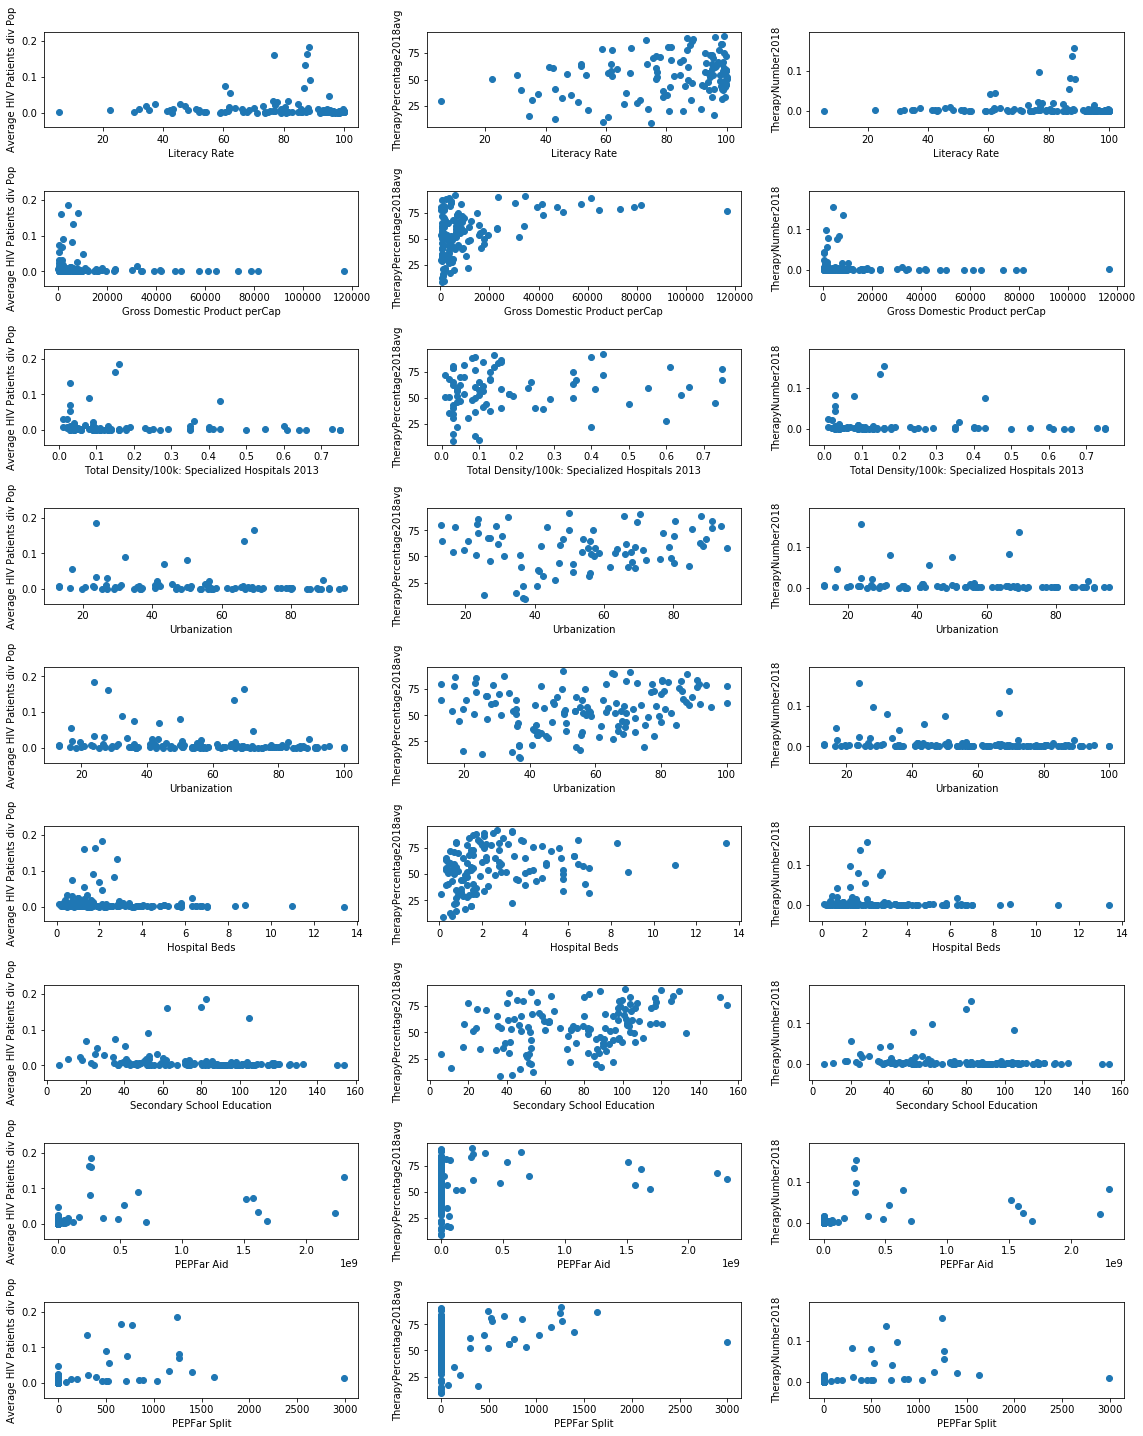

In [104]:

figs, axs = plt.subplots(9,3,figsize=(16,20))
stat = dfHIVfull.loc(axis=0)[:,'2018']
totlab = ['Literacy Rate','Gross Domestic Product perCap','Total Density/100k: Specialized Hospitals 2013',
          'Urbanization', 'Hospital Beds','Secondary School Education','PEPFar Aid','Average HIV patients', 
          'TherapyPercentage2018avg','TherapyNumber2018',
          'Average HIV Patients div Pop','PEPFar Split']
stat2 = stat
stat2['Average HIV Patients div Pop'] = stat2['Average HIV patients']/stat2['Population']
stat2['TherapyNumber2018 div Pop'] = stat2['TherapyNumber2018']/stat2['Population']
stat2['PEPFar Split'] = stat2['PEPFar Aid']/stat2['Average HIV patients']
xlab = ['Literacy Rate','Gross Domestic Product perCap','Total Density/100k: Specialized Hospitals 2013',
        'Urbanization', 'Urbanization', 'Hospital Beds','Secondary School Education','PEPFar Aid','PEPFar Split']
xstats = [stat2.sort_values(xlab[0]),
          stat2.sort_values(xlab[1]),
          stat2[stat['Total Density/100k: Specialized Hospitals 2013']<2].sort_values(xlab[2]),
          stat2[stat['Total Density/100k: Specialized Hospitals 2013']<2].sort_values(xlab[3]),
          stat2.sort_values(xlab[4]),
          stat2.sort_values(xlab[5]),
          stat2.sort_values(xlab[6]),
          stat2.sort_values(xlab[7]),
          stat2.sort_values(xlab[8])]

ystats = ['Average HIV Patients div Pop', 'TherapyPercentage2018avg','TherapyNumber2018']

x = [xstats[a][xlab[a]] for a in range(9)]
y = [[xstats[a][ystats[b]] for b in range(3)] for a in range(9)]

for a in range(9):
    for b in range(3):
        if (b == 2):
            axs[a,b].scatter(x[a],(y[a][b])/xstats[a]['Population'])
        else:
            axs[a,b].scatter(x[a],y[a][b])
        axs[a,b].set(xlabel=xlab[a],ylabel=ystats[b])

figs.tight_layout()


In [41]:

stat.loc(axis=1)['Literacy Rate','Gross Domestic Product perCap','Total Density/100k: Specialized Hospitals 2013',
        'Urbanization', 'Hospital Beds','Secondary School Education','PEPFar Aid'].cov()


,Literacy Rate,Gross Domestic Product perCap,Total Density/100k: Specialized Hospitals 2013,Urbanization,Hospital Beds,Secondary School Education,PEPFar Aid
Literacy Rate,4.342418e+02,9.161053e+04,-1.122786e+01,2.422051e+02,2.432703e+01,4.680823e+02,-7.079773e+08
Gross Domestic Product perCap,9.161053e+04,3.954883e+08,-1.856612e+03,2.459367e+05,1.501739e+04,3.399290e+05,-1.304670e+12
Total Density/100k: Specialized Hospitals 2013,-1.122786e+01,-1.856612e+03,1.123238e+01,-1.503425e+00,-2.582234e-01,-1.214218e+01,-7.145906e+07
Urbanization,2.422051e+02,2.459367e+05,-1.503425e+00,4.903642e+02,1.862510e+01,4.200089e+02,-2.184753e+09
Hospital Beds,2.432703e+01,1.501739e+04,-2.582234e-01,1.862510e+01,5.100809e+00,3.503489e+01,-1.458288e+08
Secondary School Education,4.680823e+02,3.399290e+05,-1.214218e+01,4.200089e+02,3.503489e+01,9.509099e+02,-3.385486e+09
PEPFar Aid,-7.079773e+08,-1.304670e+12,-7.145906e+07,-2.184753e+09,-1.458288e+08,-3.385486e+09,1.645904e+17


In [77]:

stat2

,,Gross Domestic Product perCap,Gross Domestic Product,Literacy Rate,Hospital Beds,Urbanization,Secondary School Education,Population,Average HIV patients,TherapyNumber2018,TherapyPercentage2018avg,Total Density/100k: Health Posts 2013,Total Density/100k: Health Centers 2103,Total Density/100k: Rural Hospitals 2013,Total Density/100k: Provincial Hospitals 2013,Total Density/100k: Specialized Hospitals 2013,Total Density/100k: Total Hospitals 2013,PEPFar Aid,Average HIV Patients div Pop,TherapyNumber2018 div Pop,PEPFar Split
country,date,,,,,,,,,,,,,,,,,,,,
Afghanistan,2018,520.896603,1.936297e+10,43.01972,0.5,25.495,53.797640,37172386.0,7200.0,920.0,13.0,2.95,1.22,0.18,0.10,0.09,0.37,0.000000e+00,0.000194,0.000025,0.000000
Angola,2018,3432.385736,1.057510e+11,66.03011,0.8,65.514,50.671480,30809762.0,330000.0,88700.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,6.397015e+07,0.010711,0.002879,193.848930
Albania,2018,5268.848504,1.510250e+10,98.14115,2.9,60.319,95.432330,2866376.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
Argentina,2018,11683.949622,5.198715e+11,99.00387,5.0,91.870,108.733600,44494502.0,140000.0,85500.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.003146,0.001922,0.000000
Armenia,2018,4212.070943,1.243309e+10,99.73607,4.2,63.149,83.150680,2951776.0,3500.0,1900.0,53.0,8.00,0.54,1.81,1.58,0.64,4.03,0.000000e+00,0.001186,0.000644,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,2018,2566.596950,2.452137e+11,95.00038,2.6,35.919,58.260181,95540395.0,230000.0,150000.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002407,0.001570,NaN
"Yemen, Rep.",2018,944.408499,2.691440e+10,54.10000,0.7,36.642,51.580680,28498687.0,11000.0,2200.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000386,0.000077,NaN
South Africa,2018,6374.028196,3.682889e+11,87.04667,2.8,66.355,104.698000,57779622.0,7700000.0,4788000.0,62.0,5.88,0.55,0.53,0.12,0.03,0.67,2.310288e+09,0.133265,0.082867,300.037433


In [105]:
HIVpartcorr = HIVstats.masscorrelation(stat2,totlab,xlab)
HIVpartcorr

,Total Density/100k: Specialized Hospitals 2013,Hospital Beds,Urbanization,PEPFar Split,Literacy Rate,PEPFar Aid,Gross Domestic Product perCap,Secondary School Education
Average HIV patients,-0.037259,-0.109938,-0.101354,0.260236,-0.025806,0.801130,-0.113274,-0.099667
TherapyPercentage2018avg,-0.127656,0.227663,0.202625,0.236433,0.287037,0.149749,0.411689,0.323533
TherapyNumber2018,-0.041271,-0.101380,-0.111523,0.283423,-0.009216,0.810891,-0.107569,-0.099347
Average HIV Patients div Pop,0.021078,-0.126943,-0.200625,0.453154,-0.022010,0.460268,-0.140589,-0.172550


In [101]:
HIVfullcorr = stat2[totlab].corr()
HIVfullcorr

In [103]:
stat2[['Literacy Rate','Gross Domestic Product perCap','Total Density/100k: Specialized Hospitals 2013',
          'Urbanization', 'Hospital Beds','Secondary School Education','PEPFar Split']].corr()

,Literacy Rate,Gross Domestic Product perCap,Total Density/100k: Specialized Hospitals 2013,Urbanization,Hospital Beds,Secondary School Education,PEPFar Split
Literacy Rate,1.000000,0.422209,-0.156677,0.538972,0.589435,0.768915,-0.118794
Gross Domestic Product perCap,0.422209,1.000000,-0.032258,0.558466,0.333540,0.552439,-0.193747
Total Density/100k: Specialized Hospitals 2013,-0.156677,-0.032258,1.000000,-0.020196,-0.037915,-0.114947,-0.055440
Urbanization,0.538972,0.558466,-0.020196,1.000000,0.374935,0.614397,-0.324430
Hospital Beds,0.589435,0.333540,-0.037915,0.374935,1.000000,0.551763,-0.175285
Secondary School Education,0.768915,0.552439,-0.114947,0.614397,0.551763,1.000000,-0.378616
PEPFar Split,-0.118794,-0.193747,-0.055440,-0.324430,-0.175285,-0.378616,1.000000


In [80]:
HIVmean = stat2.mean(axis=0)
HIVstd = stat2.std(axis=0)

In [81]:
stat3 = stat2.dropna(subset=['Gross Domestic Product perCap','TherapyPercentage2018avg'])

In [82]:
stat3

,,Gross Domestic Product perCap,Gross Domestic Product,Literacy Rate,Hospital Beds,Urbanization,Secondary School Education,Population,Average HIV patients,TherapyNumber2018,TherapyPercentage2018avg,Total Density/100k: Health Posts 2013,Total Density/100k: Health Centers 2103,Total Density/100k: Rural Hospitals 2013,Total Density/100k: Provincial Hospitals 2013,Total Density/100k: Specialized Hospitals 2013,Total Density/100k: Total Hospitals 2013,PEPFar Aid,Average HIV Patients div Pop,TherapyNumber2018 div Pop,PEPFar Split
country,date,,,,,,,,,,,,,,,,,,,,
Afghanistan,2018,520.896603,1.936297e+10,43.01972,0.5,25.495,53.797640,37172386.0,7200.0,920.0,13.0,2.95,1.22,0.18,0.10,0.09,0.37,0.000000e+00,0.000194,0.000025,0.000000
Angola,2018,3432.385736,1.057510e+11,66.03011,0.8,65.514,50.671480,30809762.0,330000.0,88700.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,6.397015e+07,0.010711,0.002879,193.848930
Argentina,2018,11683.949622,5.198715e+11,99.00387,5.0,91.870,108.733600,44494502.0,140000.0,85500.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.003146,0.001922,0.000000
Armenia,2018,4212.070943,1.243309e+10,99.73607,4.2,63.149,83.150680,2951776.0,3500.0,1900.0,53.0,8.00,0.54,1.81,1.58,0.64,4.03,0.000000e+00,0.001186,0.000644,0.000000
Australia,2018,57373.686684,1.433904e+12,NaN,3.8,86.012,150.311500,24992369.0,28000.0,22800.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.001120,0.000912,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,2018,2566.596950,2.452137e+11,95.00038,2.6,35.919,58.260181,95540395.0,230000.0,150000.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002407,0.001570,NaN
"Yemen, Rep.",2018,944.408499,2.691440e+10,54.10000,0.7,36.642,51.580680,28498687.0,11000.0,2200.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000386,0.000077,NaN
South Africa,2018,6374.028196,3.682889e+11,87.04667,2.8,66.355,104.698000,57779622.0,7700000.0,4788000.0,62.0,5.88,0.55,0.53,0.12,0.03,0.67,2.310288e+09,0.133265,0.082867,300.037433


In [83]:
GDP_Therapy_m, GDP_Therapy_b, GDP_Therapy_r, GDP_Therapy_p, GDP_Therapy_ste = stats.linregress(stat3.loc(axis=1)['Gross Domestic Product perCap','TherapyPercentage2018avg'])


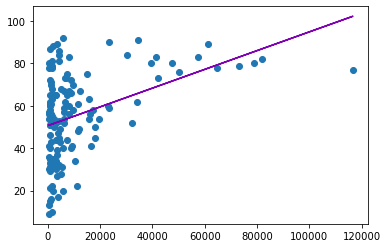

In [84]:
fig,ax = plt.subplots()
x = stat3.loc(axis=1)['Gross Domestic Product perCap']
ax.scatter(x,stat3.loc(axis=1)['TherapyPercentage2018avg'])
ax.plot(x,GDP_Therapy_m * x + GDP_Therapy_b,color=(0.5,0,0.7))


In [85]:
colly = ['Gross Domestic Product perCap','TherapyPercentage2018avg']
stat3.loc(axis=1)[colly]

,,Gross Domestic Product perCap,TherapyPercentage2018avg
country,date,,
Afghanistan,2018,520.896603,13.0
Angola,2018,3432.385736,27.0
Argentina,2018,11683.949622,61.0
Armenia,2018,4212.070943,53.0
Australia,2018,57373.686684,83.0
...,...,...,...
Vietnam,2018,2566.596950,65.0
"Yemen, Rep.",2018,944.408499,21.0
South Africa,2018,6374.028196,62.0


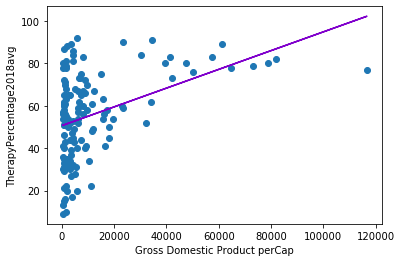

In [86]:
fig2,ax2=plt.subplots()
HIVstats.linregtograph(stat2,colly,ax2)


In [87]:
HIVstats.linregtograph(stat2,colly,ax)

In [97]:
coupley =HIVstats.easycouple(['Average HIV Patients div Pop','TherapyPercentage2018avg'],list(set(xlab)))

['Total Density/100k: Specialized Hospitals 2013', 'Average HIV Patients div Pop'] P Value:, 0.8490680968076938
['Total Density/100k: Specialized Hospitals 2013', 'TherapyPercentage2018avg'] P Value:, 0.2471899373777917
['Hospital Beds', 'Average HIV Patients div Pop'] P Value:, 0.1423298878606633
['Hospital Beds', 'TherapyPercentage2018avg'] P Value:, 0.007917216110037185
['Urbanization', 'Average HIV Patients div Pop'] P Value:, 0.019183689311732557
['Urbanization', 'TherapyPercentage2018avg'] P Value:, 0.017992359238618406
['PEPFar Split', 'Average HIV Patients div Pop'] P Value:, 2.2796476790831106e-07
['PEPFar Split', 'TherapyPercentage2018avg'] P Value:, 0.009631853816514345
['Literacy Rate', 'Average HIV Patients div Pop'] P Value:, 0.8114069990259042
['Literacy Rate', 'TherapyPercentage2018avg'] P Value:, 0.001479948587061623
['PEPFar Aid', 'Average HIV Patients div Pop'] P Value:, 1.3898526674091333e-07
['PEPFar Aid', 'TherapyPercentage2018avg'] P Value:, 0.10405385207883194
[

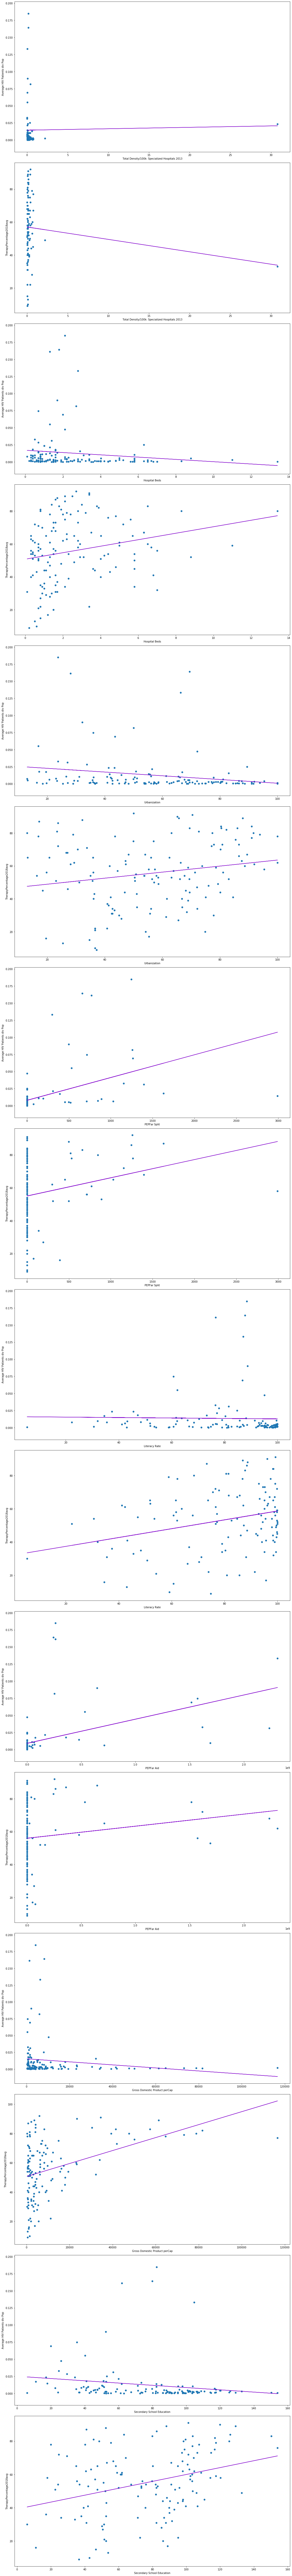

In [100]:
HIVstats.multilinreggraph(stat2,coupley)

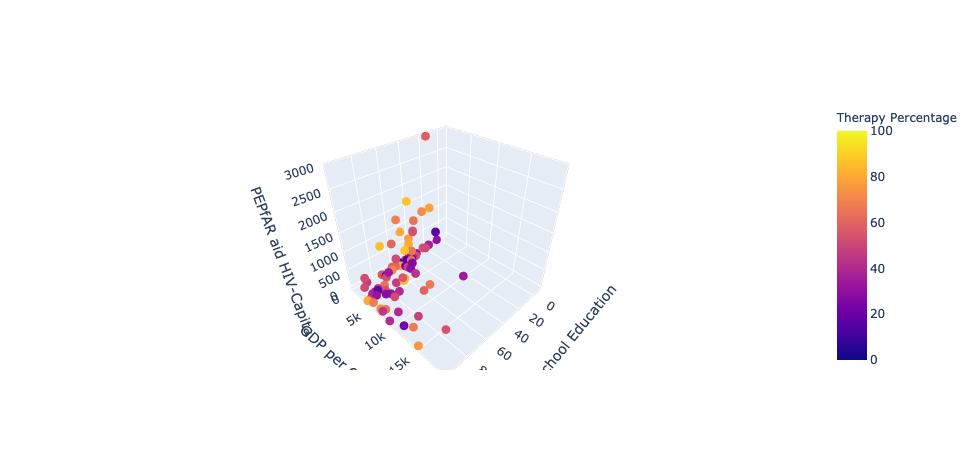

In [107]:
stat4 = stat2.dropna(subset=['Secondary School Education','TherapyPercentage2018avg','Gross Domestic Product perCap','PEPFar Split'])
fig = go.Figure(data=[go.Scatter3d(x=stat4['Secondary School Education'], 
                                   y=stat4['Gross Domestic Product perCap'], 
                                   z=stat4['PEPFar Split'],
                                   
                                   mode='markers',marker=dict(size=5,
                                                              color = stat4['TherapyPercentage2018avg'],
                                                              cmax=100,
                                                              cmin=0,
                                  colorbar=dict(title="Therapy Percentage")
                                               ))])

fig.update_layout(scene = dict(
                                xaxis_title='Secondary School Education',
                                yaxis_title='GDP per Capita',
                                zaxis_title='PEPfAR aid HIV-Capita',
                                xaxis = dict(nticks=10, range=[-10,100],),
                                yaxis = dict(nticks=10, range=[-100,20000],),
                                zaxis = dict(nticks=10, range=[-100,3000],),),)

fig.show()

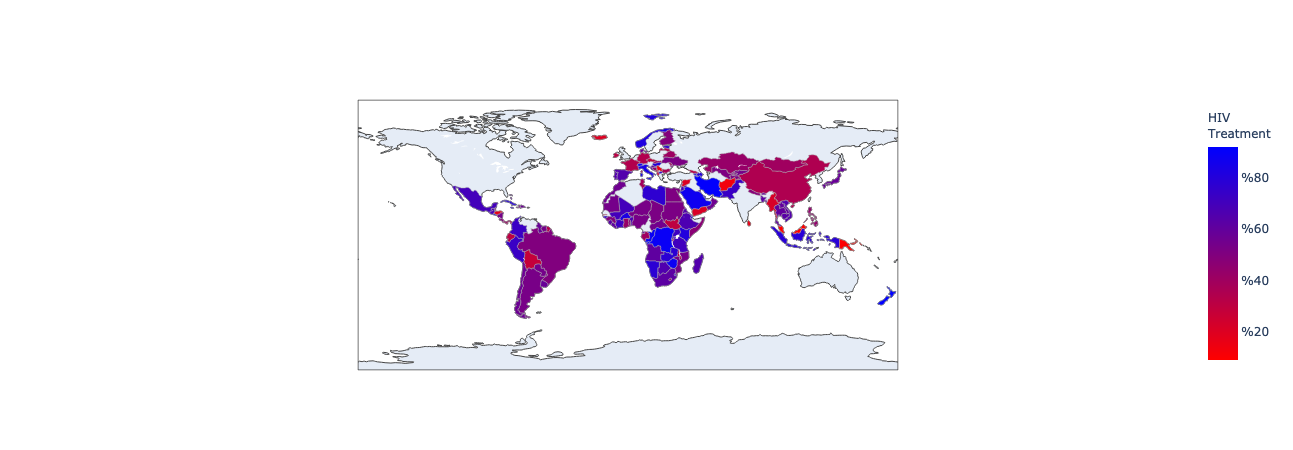

In [91]:
fig2 = go.Figure(data=go.Choropleth(
    locations = list(HIVstats.alpha3codedict.values()),
    z = stat2['TherapyPercentage2018avg'],
    text = list(HIVstats.alpha3codedict.values()),
    colorscale = 'Bluered',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '%',
    colorbar_title = ' HIV<br>Treatment',))
fig2.show()

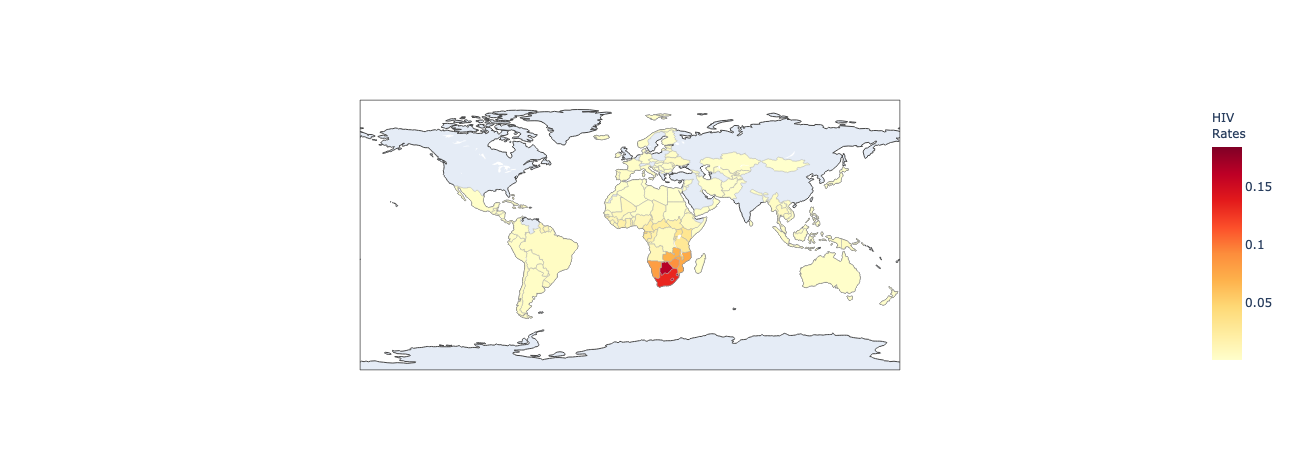

In [92]:
loccy = list(HIVstats.alpha3codedict.values()).copy()
loccy.sort()
fig3 = go.Figure(data=go.Choropleth(
    locations = loccy,
    z = stat2['Average HIV Patients div Pop'][:],
    text = list(HIVstats.alpha3codedict.values()),
    colorscale = 'YlOrRd',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = ' HIV<br>Rates',))
fig3.show()